In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# check the file Dataset.zip exsits in colab
!ls -l .


total 8
drwx------ 5 root root 4096 Jul 12 08:39 drive
drwxr-xr-x 1 root root 4096 Jul 10 13:24 sample_data


In [4]:
# unzip the Dataset.zip into dataset folder
!unzip drive/MyDrive/NeSe4/Dataset.zip -d dataset

Archive:  drive/MyDrive/NeSe4/Dataset.zip
   creating: dataset/Dataset/
  inflating: dataset/Dataset/Test.json  
  inflating: dataset/Dataset/Train.json  
  inflating: dataset/Dataset/Validation.json  
  inflating: dataset/Dataset/readme_pquad_en.txt  
  inflating: dataset/Dataset/readme_pquad_fa.txt  
   creating: dataset/Dataset/xray_dataset_covid19/
   creating: dataset/Dataset/xray_dataset_covid19/test/
   creating: dataset/Dataset/xray_dataset_covid19/test/COVID/
  inflating: dataset/Dataset/xray_dataset_covid19/test/COVID/ryct.2020200034.fig2.jpeg  
  inflating: dataset/Dataset/xray_dataset_covid19/test/COVID/ryct.2020200034.fig5-day0.jpeg  
  inflating: dataset/Dataset/xray_dataset_covid19/test/COVID/ryct.2020200034.fig5-day4.jpeg  
  inflating: dataset/Dataset/xray_dataset_covid19/test/COVID/ryct.2020200034.fig5-day7.jpeg  
  inflating: dataset/Dataset/xray_dataset_covid19/test/COVID/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg  
  inflating: dataset/Dataset/xray_dataset_

In [5]:
# extract the data relevent to our works:
!mv ./dataset/Dataset/xray_dataset_covid19/ ./dataset/

In [6]:
# chack the dataset folder:
!ls -l ./dataset/

total 8
drwxr-xr-x 2 root root 4096 Jul 12 08:42 Dataset
drwxr-xr-x 4 root root 4096 Nov 11  2023 xray_dataset_covid19


In [7]:
# remove the unnecessary files:)
!rm -r ./dataset/Dataset/

In [8]:
# chack the dataset folder:
!ls -l ./dataset/

total 4
drwxr-xr-x 4 root root 4096 Nov 11  2023 xray_dataset_covid19


**4.2.3. Data Augmentation:**

Data augmentation is a technique that can significantly increase the data instances of a dataset to train a model [23]. In the case of image datasets, the technique uses the basic image processing operations,
such as **flipping**, **rotating**, **cropping**, or **padding** for augmentation.

- Two image processing operations, **flipping** and **rotation**, have
been used in this study for data augmentation.  

  - 1- In the first phase of data augmentation, the 90 X-ray images have been **flipped** to get extra 90 images.

  - 2- In the second phase, the original 90 images have further been **rotated by 90°angle** to get 90 more images.

  - 3- **rotated by 180°angle** to get 90 more images.

  - 4- finally, the original 90 images were further **rotated by 270°angle** to get more 90 images.

These operations resulted in a dataset containing **450** COVID-19 X-ray images.

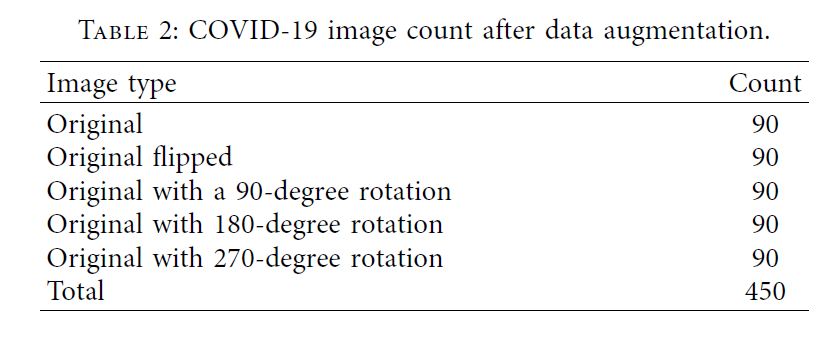

In [9]:
import cv2
import os
import random

def augment_data(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each image in the input folder
    for filename in os.listdir(input_folder):
          if filename.lower().endswith((".jpg", ".png", ".jpeg")):

            # Read the original image
            original_image = cv2.imread(os.path.join(input_folder, filename))
            # Save the original image
            save_path = os.path.join(output_folder, f"original_{filename}")
            cv2.imwrite(save_path, original_image)

            # Randomly choose to flip horizontally or vertically
            flip_direction = random.choice(["horizontal", "vertical"])

            # Flip the original image
            if flip_direction == "horizontal":
                flipped_image = cv2.flip(original_image, 1)  # 1 means horizontal flip
                save_path = os.path.join(output_folder, f"flipped_horizontal_{filename}")
            else:
                flipped_image = cv2.flip(original_image, 0)  # 0 means vertical flip
                save_path = os.path.join(output_folder, f"flipped_vertical_{filename}")
            # Save the Flipped image
            cv2.imwrite(save_path, flipped_image)

            # Rotate the original image
            for angle in [90, 180, 270]:
              if angle == 90:
                rotated_image = cv2.rotate(original_image, cv2.ROTATE_90_CLOCKWISE)
              elif angle == 180:
                rotated_image = cv2.rotate(original_image, cv2.ROTATE_90_CLOCKWISE)
                rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_CLOCKWISE)
              elif angle == 270:
                rotated_image = cv2.rotate(original_image, cv2.ROTATE_90_CLOCKWISE)
                rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_CLOCKWISE)
                rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_CLOCKWISE)
              # Save the rotated image
              save_path = os.path.join(output_folder, f"rotated_{angle}_{filename}")
              cv2.imwrite(save_path, rotated_image)



In [10]:
# Do the augmentation on train/COVID images and store them in augmented/COVID
augment_data(input_folder="dataset/xray_dataset_covid19/train/COVID/", output_folder="dataset/xray_dataset_covid19/augmented/COVID")
# Do the augmentation on train/NORMAL images and store them in augmented/NORMAL
augment_data(input_folder="dataset/xray_dataset_covid19/train/NORMAL/", output_folder="dataset/xray_dataset_covid19/augmented/NORMAL")

In [11]:
# check the result of augmentation
! ls -l ./dataset/xray_dataset_covid19/augmented/

total 60
drwxr-xr-x 2 root root 36864 Jul 12 08:43 COVID
drwxr-xr-x 2 root root 24576 Jul 12 08:44 NORMAL


In [12]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt


# Load the augmented data
augmented_data = tf.keras.utils.image_dataset_from_directory(
    directory='dataset/xray_dataset_covid19/augmented/',
    image_size=(150, 150),
    )


# Load the test data
test_data = tf.keras.utils.image_dataset_from_directory(
    directory='dataset/xray_dataset_covid19/test/',
    image_size=(150, 150),
    )


Found 740 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


In [13]:
# Show the class names of augmented data
class_names = augmented_data.class_names
class_names

['COVID', 'NORMAL']

In [14]:
# Show the class names of test data
class_names = test_data.class_names
class_names

['COVID', 'NORMAL']


class 0 => covid

class 1 => normal







In [15]:
# Rescale the augmented data
augmented_data = augmented_data.map(lambda x, y: (x/255, y))

# Rescale the test data
test_data = test_data.map(lambda x, y: (x/255, y))

In [16]:
# Create validation data
validation_data = tf.keras.utils.image_dataset_from_directory(
    directory='dataset/xray_dataset_covid19/augmented/',
    image_size=(150, 150),
    validation_split=0.25,
    subset="validation",
    seed=1337
)

# Normalize the pixel values to be between 0 and 1
validation_data = validation_data.map(lambda x, y: (x / 255, y))


Found 740 files belonging to 2 classes.
Using 185 files for validation.


In [17]:
# Convert them to iterators
# For augmented data:
augmented_data_iterator = augmented_data.as_numpy_iterator()

# For test data:
test_data_iterator = test_data.as_numpy_iterator()

In [18]:
# Get a bath of augmented images:
augmented_data_batch = augmented_data_iterator.next()
len(augmented_data_batch)

2

In [19]:
# Images represented as numbpy arrays
augmented_data_batch[0].shape

(32, 150, 150, 3)

In [20]:
# The labels:
augmented_data_batch[1]

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int32)

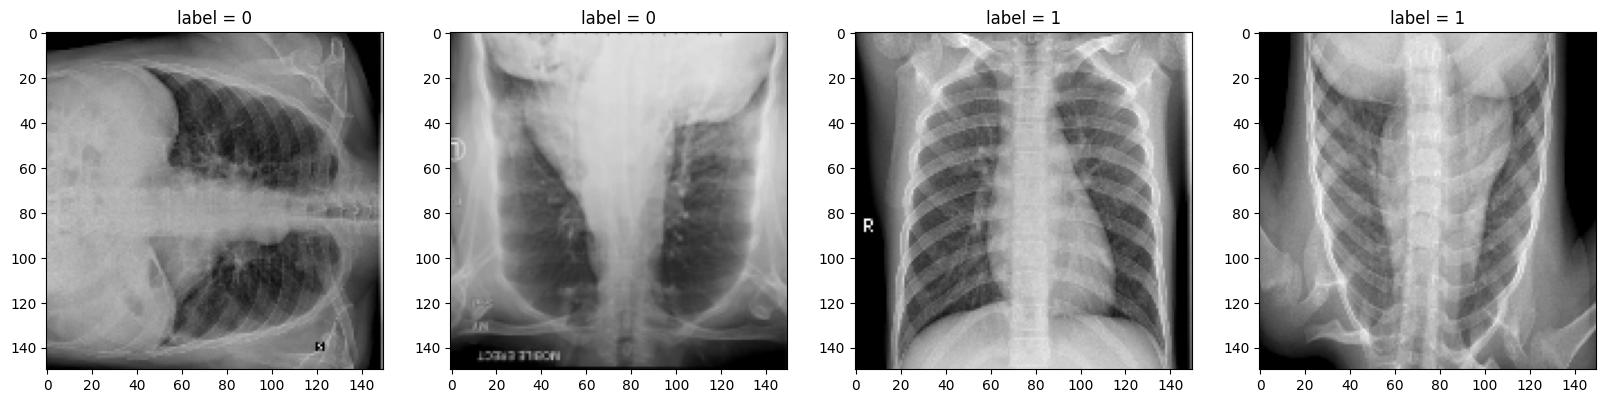

In [21]:
# Show 4 images of batch
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for index, image in enumerate(augmented_data_batch[0][:4]):
  ax[index].imshow(image)
  ax[index].title.set_text(f"label = {augmented_data_batch[1][index]}")

In [22]:
# Get another batch from the iterator:
another_augmented_data_batch = augmented_data_iterator.next()
len(another_augmented_data_batch)

2

In [23]:
# The labels
another_augmented_data_batch[1]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int32)

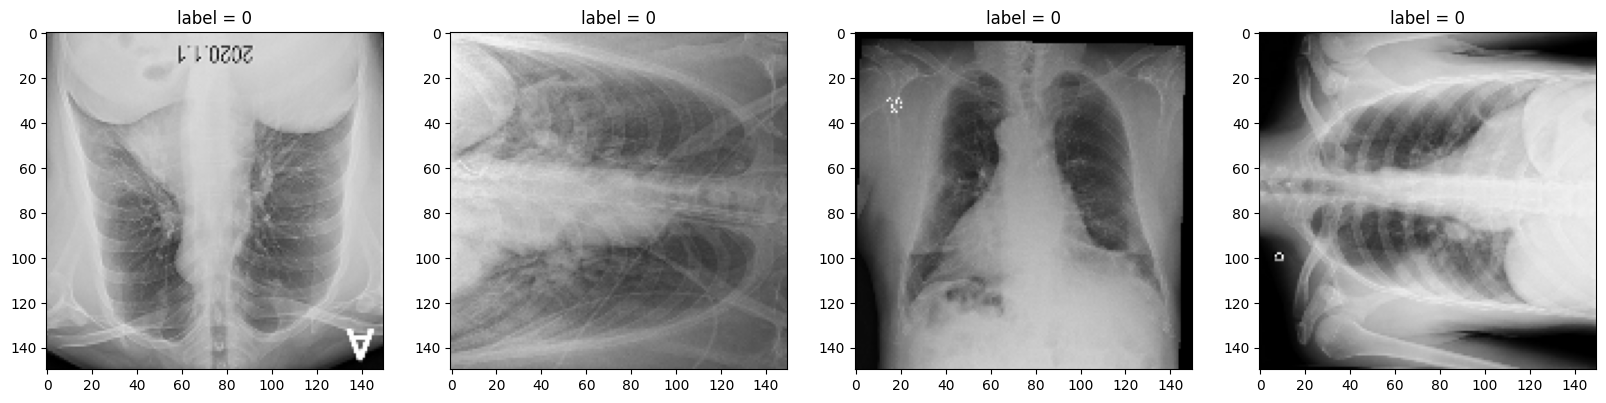

In [24]:
# Show 4 images of batch
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for index, image in enumerate(another_augmented_data_batch[0][:4]):
  ax[index].imshow(image)
  ax[index].title.set_text(f"label = {another_augmented_data_batch[1][index]}")

In [25]:
# Get the a batch of test data:
test_data_batch = test_data_iterator.next()
len(test_data_batch)

2

In [26]:
# The labels
test_data_batch[1]

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int32)

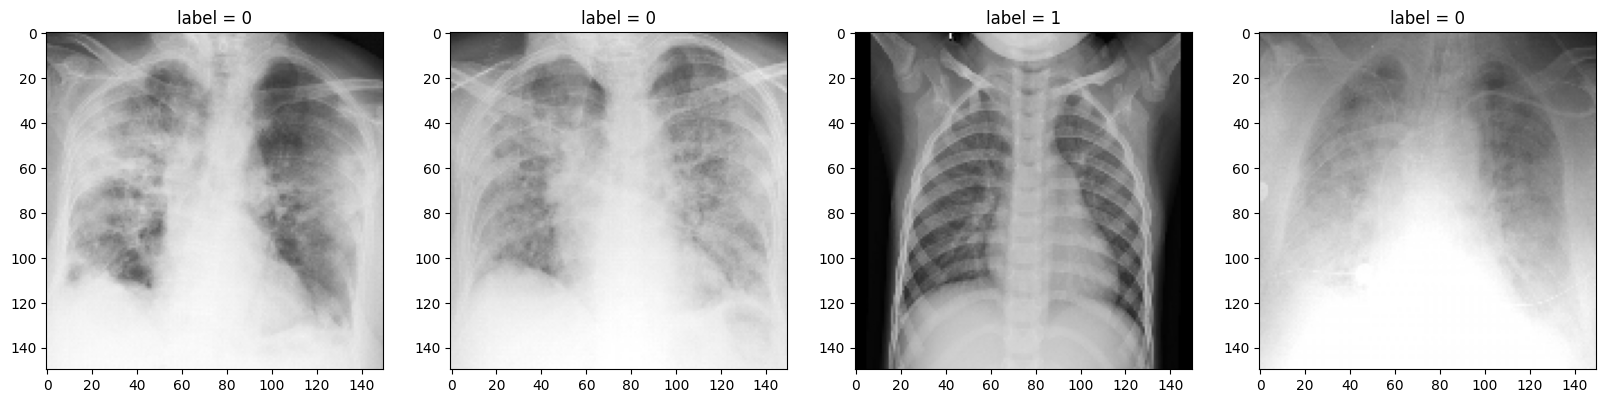

In [27]:
# Show 4 images of test data batch
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for index, image in enumerate(test_data_batch[0][:4]):
  ax[index].imshow(image)
  ax[index].title.set_text(f"label = {test_data_batch[1][index]}")

**4.3.1. The Proposed CNN Architecture.**

 The proposed CNN model consists of 38 layers in which 6 are convolutional (Conv2D), 6 max pooling layers, 6 dropout layers, 8 activation function layers, 8 batch normalization layers, 1 flatten layer, and 3 fully connected layers; CNN model input image shape is (150, 150, 3), i.e., 150-by-150 RGB image. In all Con2D layers, a 3 × 3 size kernel has been used but the filter size after every two Con2D layers increases. At the 1st and 2nd layers of Con2D, 64 filters have been used to learn from input and the 3rd and 4th layers of Con2D use 128 filters, and at the 5th and 6th layers, 256 filters have been used. After each Con2D layer, the max pooling layer with 2 × 2 pooling size has been used, the batch normalization layer has been used with the axis = −1 argument, the activation layer has been used with the ReLU function, and the dropout layer has been used with 20% dropout rate. The output of 256 output neurons of the final Con2D layer is followed by max pooling, batch normalization, activation, and dropout layer. Since the final pooling and convolutional layer gives a three-dimensional matrix as output, to flatten the matrix, a flattening layer has been used which converts them into a vector that will be input for 3 dense layers. This study uses CNN for binary classification; that is the reason for using the binary crossentropy (BCE) loss function. In binary classification since only one output node is needed to classify the data to one of the two given classes, so in the case of BCE loss function, the output value is being given to a sigmoid activation function. The output given by the sigmoid activation function lies between 0 and 1. It finds the error between the predicted class and the actual class. The “Adam” optimizer has been used which changes the attribute weight and learning rate to reduce the loss of the learning model. The model parameter values are given in Table 3, and the model architecture is given in Figure 4.
During the initial experiments, the CNN has been used withdifferent configurations in terms of the usage of number of convolution layers in the model. The decision of how many convolution layers used in the model was made by using an incremental approach. First, the CNN was tested using only one convolutional layer and the results were analysed. Then, the CNN was built with two layers and results were analysed and so on. The approach had been continued till the results provided by the model were accurate and effective. The final model which was very feasible according to its results consisted of six convolution layers. The results of each increment of the model have been reported in the Results section.

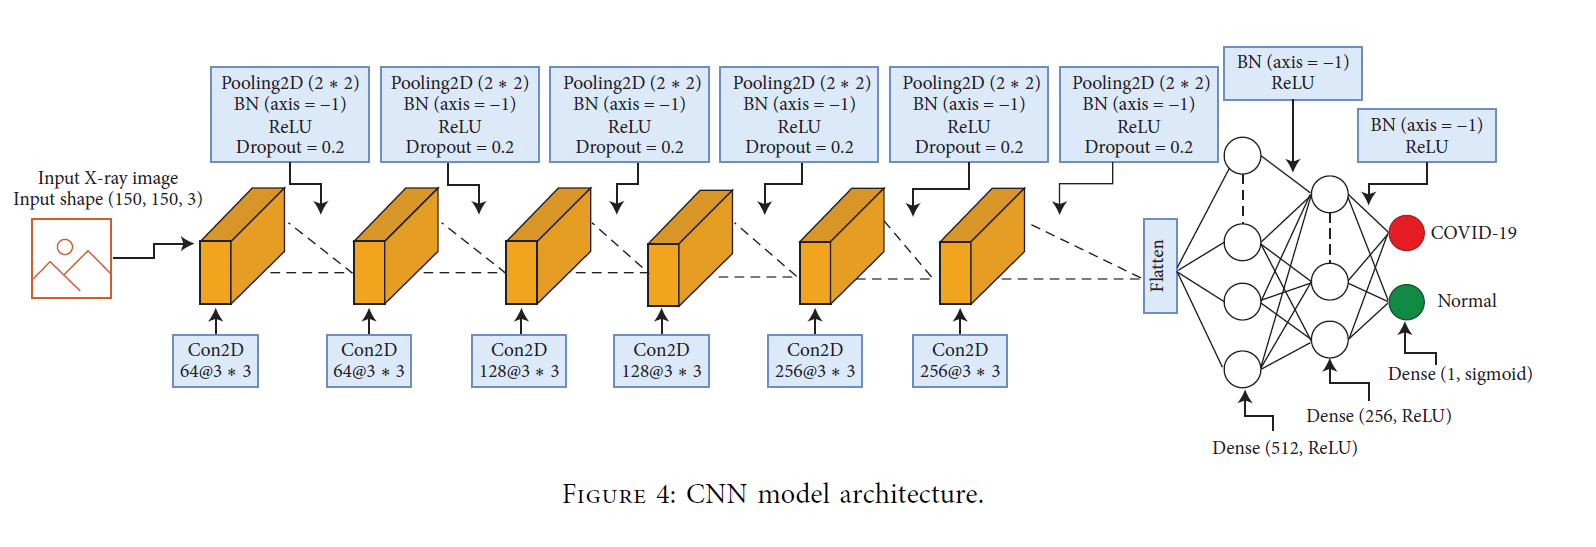

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, GlobalAveragePooling2D

# Create the CNN model
model = Sequential()

# Convolutional Layers with increased filters and better structure
# First layer
model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Second layer
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third layer
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fourth layer
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Global Average Pooling Layer instead of Flatten
model.add(GlobalAveragePooling2D())

# Fully Connected Layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Create an instance of the Adam optimizer with the desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Lower learning rate for better convergence

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 75, 75, 64)        256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 128)       0

Epoch 1/50
24/24 [==============================] - 28s 527ms/step - loss: 0.6561 - accuracy: 0.7014 - val_loss: 0.7070 - val_accuracy: 0.4703
Epoch 2/50
24/24 [==============================] - 14s 404ms/step - loss: 0.4171 - accuracy: 0.8297 - val_loss: 0.7776 - val_accuracy: 0.4703
Epoch 3/50
24/24 [==============================] - 14s 406ms/step - loss: 0.3802 - accuracy: 0.8649 - val_loss: 0.9080 - val_accuracy: 0.4703
Epoch 4/50
24/24 [==============================] - 14s 462ms/step - loss: 0.3254 - accuracy: 0.8730 - val_loss: 1.4580 - val_accuracy: 0.4703
Epoch 5/50
24/24 [==============================] - 18s 570ms/step - loss: 0.2594 - accuracy: 0.9027 - val_loss: 1.6661 - val_accuracy: 0.4703
Epoch 6/50
24/24 [==============================] - 14s 466ms/step - loss: 0.2571 - accuracy: 0.8892 - val_loss: 2.4833 - val_accuracy: 0.4703
Epoch 7/50
24/24 [==============================] - 14s 406ms/step - loss: 0.2676 - accuracy: 0.9027 - val_loss: 2.8779 - val_accuracy: 0.4703

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


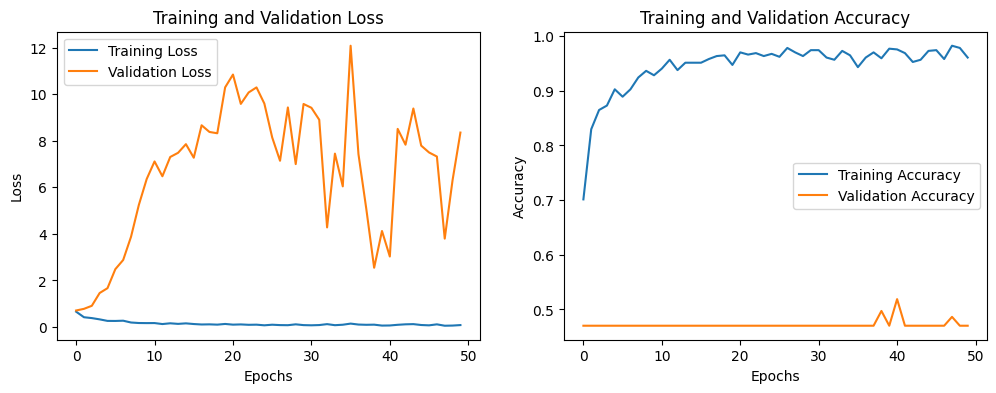

In [29]:

# Train the model using the augmented_data for training and validation_data for validation
history = model.fit(
    augmented_data,
    epochs=50,
    validation_data=validation_data
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')

# Save the trained model
model.save("./models/model.h5")


# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


2/2 [==============================] - 1s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5000
Precision: 0.0000
Recall (Sensitivity): 0.0000
F1 Score: 0.0000
Specificity: 1.0000


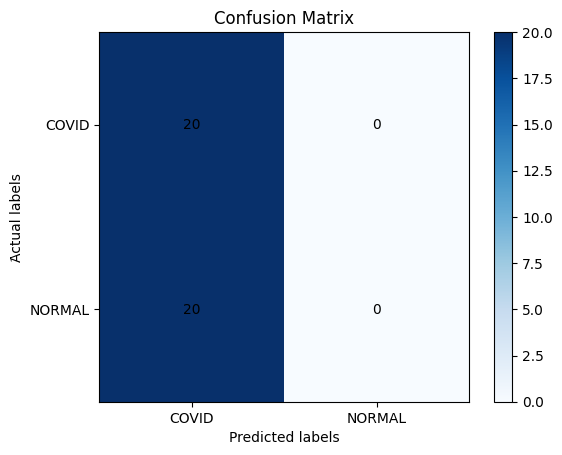

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
predictions = model.predict(test_data)

# Convert predictions to binary values (0 or 1)
binary_predictions = np.round(predictions)

# Extract true labels from the test data
true_labels = np.concatenate([y for x, y in test_data], axis=0)

# Flatten the predictions for calculating metrics
binary_predictions = binary_predictions.flatten()
true_labels = true_labels.flatten()

# Calculate metrics
accuracy = accuracy_score(true_labels, binary_predictions)
precision = precision_score(true_labels, binary_predictions)
recall = recall_score(true_labels, binary_predictions)
f1 = f1_score(true_labels, binary_predictions)

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, binary_predictions)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['COVID', 'NORMAL']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted labels')
plt.ylabel('َActual labels')

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center')

plt.show()

**Extra part:**

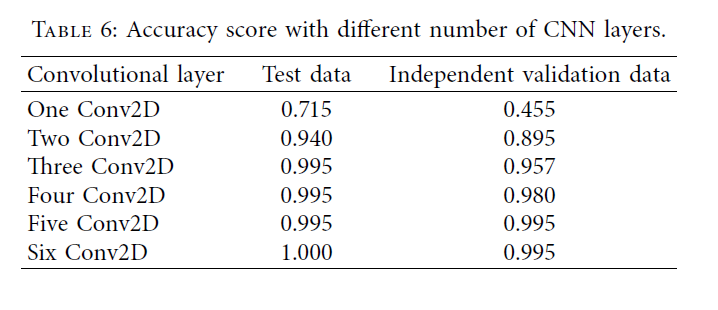

**One Conv2D** :

In [ ]:
# Create a dictionary to store the results
results = {'Convolutional Layers': [], 'Test Accuracy': [], 'Validation Accuracy': []}

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# model with one CONV2D:
model_one_conv2d = Sequential()

# Convolutional Layers
# First layer
model_one_conv2d.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model_one_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_one_conv2d.add(BatchNormalization())
model_one_conv2d.add(Dropout(0.2))

# Flatten Layer
model_one_conv2d.add(Flatten())

# Fully Connected Layers
model_one_conv2d.add(Dense(512, activation='relu'))
model_one_conv2d.add(BatchNormalization())

model_one_conv2d.add(Dense(256, activation='relu'))
model_one_conv2d.add(BatchNormalization())

# Output Layer
model_one_conv2d.add(Dense(1, activation='sigmoid'))

# Create an instance of the Adam optimizer with the desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)

# Compile the model_one_conv2d
model_one_conv2d.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model_one_conv2d summary
model_one_conv2d.summary()

In [ ]:
# Train the model using the augmented_data for training and validation_data for validation
history = model_one_conv2d.fit(
    augmented_data,
    epochs=50,
    validation_data=validation_data
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')

# Save the trained model
model_one_conv2d.save("./models/model_one_conv2d.h5")



# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# Evaluate on test and validation data
test_accuracy_one_CONV2D = model_one_conv2d.evaluate(test_data, verbose=1)[1]
val_accuracy_one_CONV2D = model_one_conv2d.evaluate(validation_data, verbose=1)[1]

# Display the results
print("Evaluate on test and validation data:\n")
print(f"test accuracy: {test_accuracy_one_CONV2D}\n")
print(f"validation accuracy: {val_accuracy_one_CONV2D}\n")

In [ ]:
# Store the results
results['Convolutional Layers'].append("One CONV2D")
results['Test Accuracy'].append(test_accuracy_one_CONV2D)
results['Validation Accuracy'].append(val_accuracy_one_CONV2D)
results

**Two Conv2D**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# Create the CNN model
model_two_conv2d = Sequential()

# Convolutional Layers
# First layer
model_two_conv2d.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model_two_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_two_conv2d.add(BatchNormalization())
model_two_conv2d.add(Dropout(0.2))

# Second layer:
model_two_conv2d.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_two_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_two_conv2d.add(BatchNormalization())
model_two_conv2d.add(Dropout(0.2))

# Flatten Layer
model_two_conv2d.add(Flatten())

# Fully Connected Layers
model_two_conv2d.add(Dense(512, activation='relu'))
model_two_conv2d.add(BatchNormalization())

model_two_conv2d.add(Dense(256, activation='relu'))
model_two_conv2d.add(BatchNormalization())

# Output Layer
model_two_conv2d.add(Dense(1, activation='sigmoid'))

# Create an instance of the Adam optimizer with the desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)

# Compile the model_two_conv2d
model_two_conv2d.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model_two_conv2d summary
model_two_conv2d.summary()


In [ ]:
# Train the model using the augmented_data for training and validation_data for validation
history = model_two_conv2d.fit(
    augmented_data,
    epochs=50,
    validation_data=validation_data
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')

# Save the trained model
model_two_conv2d.save("./models/model_two_conv2d.h5")


# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Evaluate on test and validation data
test_accuracy_two_CONV2D = model_two_conv2d.evaluate(test_data, verbose=1)[1]
val_accuracy_two_CONV2D = model_two_conv2d.evaluate(validation_data, verbose=1)[1]

# Display the results
print("Evaluate on test and validation data:\n")
print(f"test accuracy: {test_accuracy_two_CONV2D}\n")
print(f"validation accuracy: {val_accuracy_two_CONV2D}\n")

results['Convolutional Layers'].append("Two CONV2D")
results['Test Accuracy'].append(test_accuracy_two_CONV2D)
results['Validation Accuracy'].append(val_accuracy_two_CONV2D)
results

**Three CONV2D**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# Create the CNN model
model_three_conv2d = Sequential()

# Convolutional Layers
# First layer
model_three_conv2d.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model_three_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_three_conv2d.add(BatchNormalization())
model_three_conv2d.add(Dropout(0.2))

# Second layer:
model_three_conv2d.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_three_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_three_conv2d.add(BatchNormalization())
model_three_conv2d.add(Dropout(0.2))

# Third layer:
model_three_conv2d.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_three_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_three_conv2d.add(BatchNormalization())
model_three_conv2d.add(Dropout(0.2))

# Flatten Layer
model_three_conv2d.add(Flatten())

# Fully Connected Layers
model_three_conv2d.add(Dense(512, activation='relu'))
model_three_conv2d.add(BatchNormalization())

model_three_conv2d.add(Dense(256, activation='relu'))
model_three_conv2d.add(BatchNormalization())

# Output Layer
model_three_conv2d.add(Dense(1, activation='sigmoid'))

# Create an instance of the Adam optimizer with the desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)

# Compile the model_three_conv2d
model_three_conv2d.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model_three_conv2d summary
model_three_conv2d.summary()


In [ ]:
# Train the model using the augmented_data for training and validation_data for validation
history = model_three_conv2d.fit(
    augmented_data,
    epochs=50,
    validation_data=validation_data
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')

# Save the trained model
model_three_conv2d.save("./models/model_three_conv2d.h5")



# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Evaluate on test and validation data
test_accuracy_three_CONV2D = model_three_conv2d.evaluate(test_data, verbose=1)[1]
val_accuracy_three_CONV2D = model_three_conv2d.evaluate(validation_data, verbose=1)[1]

# Display the results
print("Evaluate on test and validation data:\n")
print(f"test accuracy: {test_accuracy_three_CONV2D}\n")
print(f"validation accuracy: {val_accuracy_three_CONV2D}\n")

results['Convolutional Layers'].append("Three CONV2D")
results['Test Accuracy'].append(test_accuracy_three_CONV2D)
results['Validation Accuracy'].append(val_accuracy_three_CONV2D)
results

**Four CONV2D**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# Create the CNN model
model_four_conv2d = Sequential()

# Convolutional Layers
# First layer
model_four_conv2d.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model_four_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_four_conv2d.add(BatchNormalization())
model_four_conv2d.add(Dropout(0.2))

# Second layer:
model_four_conv2d.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_four_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_four_conv2d.add(BatchNormalization())
model_four_conv2d.add(Dropout(0.2))

# Third layer:
model_four_conv2d.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_four_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_four_conv2d.add(BatchNormalization())
model_four_conv2d.add(Dropout(0.2))

# Forth layer:
model_four_conv2d.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_four_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_four_conv2d.add(BatchNormalization())
model_four_conv2d.add(Dropout(0.2))

# Flatten Layer
model_four_conv2d.add(Flatten())

# Fully Connected Layers
model_four_conv2d.add(Dense(512, activation='relu'))
model_four_conv2d.add(BatchNormalization())

model_four_conv2d.add(Dense(256, activation='relu'))
model_four_conv2d.add(BatchNormalization())

# Output Layer
model_four_conv2d.add(Dense(1, activation='sigmoid'))

# Create an instance of the Adam optimizer with the desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)

# Compile the model_four_conv2d
model_four_conv2d.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model_four_conv2d summary
model_four_conv2d.summary()


In [ ]:
# Train the model using the augmented_data for training and validation_data for validation
history = model_four_conv2d.fit(
    augmented_data,
    epochs=50,
    validation_data=validation_data
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')

# Save the trained model
model_four_conv2d.save("./models/model_four_conv2d.h5")



# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Evaluate on test and validation data
test_accuracy_four_CONV2D = model_four_conv2d.evaluate(test_data, verbose=1)[1]
val_accuracy_four_CONV2D = model_four_conv2d.evaluate(validation_data, verbose=1)[1]

# Display the results
print("Evaluate on test and validation data:\n")
print(f"test accuracy: {test_accuracy_four_CONV2D}\n")
print(f"validation accuracy: {val_accuracy_four_CONV2D}\n")

results['Convolutional Layers'].append("Four CONV2D")
results['Test Accuracy'].append(test_accuracy_four_CONV2D)
results['Validation Accuracy'].append(val_accuracy_four_CONV2D)
results

**Five CONV2D**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# Create the CNN model
model_five_conv2d = Sequential()

# Convolutional Layers
# First layer
model_five_conv2d.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model_five_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_five_conv2d.add(BatchNormalization())
model_five_conv2d.add(Dropout(0.2))

# Second layer:
model_five_conv2d.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_five_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_five_conv2d.add(BatchNormalization())
model_five_conv2d.add(Dropout(0.2))

# Third layer:
model_five_conv2d.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_five_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_five_conv2d.add(BatchNormalization())
model_five_conv2d.add(Dropout(0.2))

# Forth layer:
model_five_conv2d.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_five_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_five_conv2d.add(BatchNormalization())
model_five_conv2d.add(Dropout(0.2))

# Fifth layer:
model_five_conv2d.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_five_conv2d.add(MaxPooling2D(pool_size=(2, 2)))
model_five_conv2d.add(BatchNormalization())
model_five_conv2d.add(Dropout(0.2))

# Flatten Layer
model_five_conv2d.add(Flatten())

# Fully Connected Layers
model_five_conv2d.add(Dense(512, activation='relu'))
model_five_conv2d.add(BatchNormalization())

model_five_conv2d.add(Dense(256, activation='relu'))
model_five_conv2d.add(BatchNormalization())

# Output Layer
model_five_conv2d.add(Dense(1, activation='sigmoid'))

# Create an instance of the Adam optimizer with the desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)

# Compile the model_five_conv2d
model_five_conv2d.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model_five_conv2d summary
model_five_conv2d.summary()


In [ ]:
# Train the model using the augmented_data for training and validation_data for validation
history = model_five_conv2d.fit(
    augmented_data,
    epochs=50,
    validation_data=validation_data
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')

# Save the trained model
model_five_conv2d.save("./models/model_five_conv2d.h5")



# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Evaluate on test and validation data
test_accuracy_five_CONV2D = model_five_conv2d.evaluate(test_data, verbose=1)[1]
val_accuracy_five_CONV2D = model_five_conv2d.evaluate(validation_data, verbose=1)[1]

# Display the results
print("Evaluate on test and validation data:\n")
print(f"test accuracy: {test_accuracy_five_CONV2D}\n")
print(f"validation accuracy: {val_accuracy_five_CONV2D}\n")

results['Convolutional Layers'].append("Five CONV2D")
results['Test Accuracy'].append(test_accuracy_five_CONV2D)
results['Validation Accuracy'].append(val_accuracy_five_CONV2D)
results

**Six CONV2D**

In [ ]:
# Evaluate on test and validation data
test_accuracy_six_CONV2D = model.evaluate(test_data, verbose=1)[1]
val_accuracy_six_CONV2D = model.evaluate(validation_data, verbose=1)[1]

# Display the results
print("Evaluate on test and validation data:\n")
print(f"test accuracy: {test_accuracy_six_CONV2D}\n")
print(f"validation accuracy: {val_accuracy_six_CONV2D}\n")

results['Convolutional Layers'].append("Six CONV2D")
results['Test Accuracy'].append(test_accuracy_six_CONV2D)
results['Validation Accuracy'].append(val_accuracy_six_CONV2D)
results

In [ ]:


# Display the results
print("Table 6: Accuracy score with different numbers of CNN layers")
print("{:<20} {:<20} {:<20}".format('Convolutional Layers', 'Test Accuracy', 'Validation Accuracy'))
for i in range(6):
    print("{:<20} {:<20.3f} {:<20.3f}".format(results['Convolutional Layers'][i], results['Test Accuracy'][i], results['Validation Accuracy'][i]))

# Plot comparison of models
plt.figure(figsize=(10, 6))
plt.plot(results['Convolutional Layers'], results['Test Accuracy'], label='Test Accuracy')
plt.plot(results['Convolutional Layers'], results['Validation Accuracy'], label='Validation Accuracy')
plt.title('Comparison of Models with Different Convolutional Layers')
plt.xlabel('Number of Convolutional Layers')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
!zip -r ./folders.zip ./dataset/

In [ ]:
from google.colab import files
files.download("./folders.zip")